In [1]:
from fastai.vision import *
import save_urls

In [4]:
!mkdir -p ./data/test
!wget -q -P ./data/test https://pbs.twimg.com/profile_images/759735485388427265/LeMLP89w.jpg

In [5]:
classes = ['man_portrait', 'woman_portrait']
path = Path('data')
image_size = 224

In [6]:
def urls_to_pics(c):
    file = f'urls_{c}'
    dest = path/'train'/c
    
    print(f'Downloading "{c}" pictures into {dest}. [{len(dest.ls())}]')
    
    download_images(path/file, dest, max_pics=100, timeout=1)
    print(f'Download completed. [{len(dest.ls())}]')
    
    verify_images(dest, delete=True, max_size=image_size * 2)
    print(f'Verifycation complete. \n\nTotal {len(dest.ls())} {c} images.\n\n')

In [7]:
for c in classes:
    dest = path/'train'/c
    dest.mkdir(parents=True, exist_ok=True)
    c_len = len(dest.ls())
    
    if c_len > 60:
        print(f'Downloading skipped. {c_len} images in {dest}')
    else:
        response = save_urls.GoogleImages()
        response.save_url(c)
        urls_to_pics(c)

man_portrait: https://www.google.com/search?q=man+portrait&tbm=isch&tbm=isch&tbs=isz:m,ic:color
Saved 100 URLs to data/urls_man_portrait


Error https://www.abc.net.au/cm/lb/9722224/data/archibald-finalist-guy-pearce-data.jpg HTTPSConnectionPool(host='www.abc.net.au', port=443): Read timed out. (read timeout=1)
Error https://www.photographyproject.com.au/wp-content/uploads/photo-gallery/creativeportraits/creative-portrait-2.jpg HTTPSConnectionPool(host='www.photographyproject.com.au', port=443): Read timed out. (read timeout=1)
Error https://www.vincentvangogh.org/images/paintings/self-portrait.jpg HTTPSConnectionPool(host='www.vincentvangogh.org', port=443): Max retries exceeded with url: /images/paintings/self-portrait.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://static.boredpanda.com/blog/wp-content/uploads/2017/11/sexiest-man-alive-years-people-magazine-51-5a157ba8e26e7__700.jpg HTTPSConnectionPool(host='static.boredpanda.com', port=443): Read timed out. (read timeout=1)
Error https://www.pablopicasso.org/ima

cannot identify image file <_io.BufferedReader name='data/train/man_portrait/00000069.jpg'>
Verifycation complete. 

Total 92 man_portrait images.
woman_portrait: https://www.google.com/search?q=woman+portrait&tbm=isch&tbm=isch&tbs=isz:m,ic:color
Saved 100 URLs to data/urls_woman_portrait


Error https://proxy.europeana.eu/08533/artifact_aspx_id_1096?api_url=https%3A%2F%2Fapi.europeana.eu%2Fapi&view=http%3A%2F%2Ffinearts.heritagemalta.org%2Fimg%2F828%2F59-60.tif.thumb.jpg HTTPSConnectionPool(host='proxy.europeana.eu', port=443): Read timed out. (read timeout=1)
Error https://f12.pmo.ee/_0bbpXNvkMr0-aYEa8eGcRG965o=/685x410/filters:focal(1x401:3995x2625)/nginx/o/2019/01/08/11701637t1h7d28.jpg HTTPSConnectionPool(host='f12.pmo.ee', port=443): Read timed out. (read timeout=1)
Error https://image.shutterstock.com/image-photo/portrait-young-thoughtful-woman-on-260nw-658557499.jpg HTTPSConnectionPool(host='image.shutterstock.com', port=443): Read timed out. (read timeout=1)
Download completed. [97]


cannot identify image file <_io.BufferedReader name='data/train/woman_portrait/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/train/woman_portrait/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/train/woman_portrait/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/train/woman_portrait/00000017.jpg'>
Verifycation complete. 

Total 93 woman_portrait images.


In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path/'train', valid_pct=0.2,
        ds_tfms=get_transforms(), size=image_size, num_workers=4, test='test').normalize(imagenet_stats)

In [9]:
data.classes

['man_portrait', 'woman_portrait']

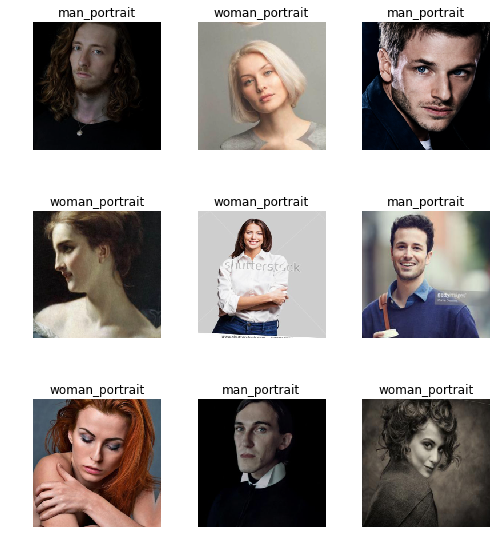

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5)
#learn.save('stage-1')